In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, glob

In [2]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, 
                         vmin= -1, vmax=1,
                         cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})

In [3]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                    index_col=0)

In [4]:
data.columns

Index(['Observed', 'F_Time', 'NDE_cycle', 'diff_two_peaks_ratio', 'amp_ratio',
       'pos_ratio', 'energy_ratio', 'NLE_ratio_51_17', 'NLE_ratio_85_17',
       'NLO_avg', 'Avg_RP', 'ACEE_30_Avg_58', 'ACEE_500_Avg_58',
       'ACPD_Avg_58'],
      dtype='object')

In [6]:
data_f = data.drop(['Observed'], axis=1)

### Plotting

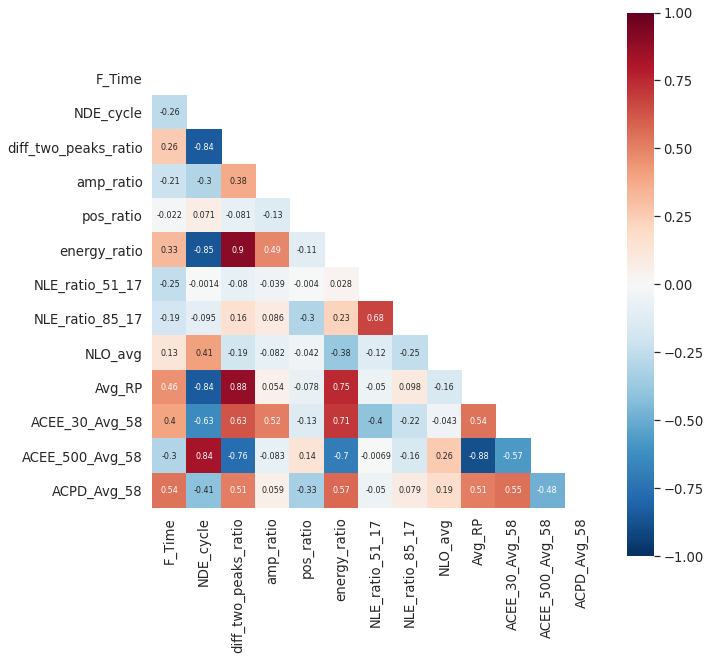

In [7]:
plot_corr(data_f, figsize=(10,10))

In [ ]:
sns.set_style('white')
sns.pairplot(data.drop('Observed', axis=1), hue='NDE_cycle')

In [9]:
data.drop(['Observed'], axis=1).columns[1:]

Index(['NDE_cycle', 'diff_two_peaks_ratio', 'amp_ratio', 'pos_ratio',
       'energy_ratio', 'NLE_ratio_51_17', 'NLE_ratio_85_17', 'NLO_avg',
       'Avg_RP', 'ACEE_30_Avg_58', 'ACEE_500_Avg_58', 'ACPD_Avg_58'],
      dtype='object')

In [10]:
data

,Observed,F_Time,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
ID,,,,,,,,,,,,,,
41C,True,2154137.0,0,2.104871,1.185236,1.002988,1.559453,0.893268,1.107898,5.576476,190.979294,-0.137640,-2.866030,4.804749
44C,True,1318034.0,0,2.280959,1.365329,0.998446,1.504218,0.888503,1.140535,4.619563,187.204261,-0.596385,-2.788500,3.370729
45C,False,3245267.0,0,1.245687,0.809970,0.989351,1.282046,0.896534,1.137561,3.458337,189.010633,-0.645710,-3.202220,4.186639
19C,True,464392.0,450000,0.763296,1.128928,1.002407,1.126849,0.978877,1.235508,3.798736,171.925123,-1.065155,-1.570740,3.226957
32C,True,306142.0,450000,0.610771,1.137713,0.994283,0.844962,0.844824,1.091099,4.296261,169.717689,-0.617190,-1.312415,2.907922
23C,False,2255225.0,600000,0.397580,0.919473,0.999861,0.846653,0.918699,1.114762,5.621833,173.403495,-0.831110,-1.194540,3.061743
25C,False,1444844.0,600000,0.821445,1.178319,1.003158,1.141313,0.881052,1.083718,3.061693,172.727399,-0.912065,-0.927155,3.284087
21C,True,200007.0,600000,0.705402,1.151889,0.984968,0.853808,0.929446,1.119635,4.626314,174.003954,-0.884900,-1.578795,2.764862
27C,True,297627.0,750000,0.144147,0.777585,1.002966,0.394731,0.912962,1.112708,5.020607,173.688949,-1.276355,-1.602150,2.746634


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'diff_two_peaks_ratio'),
  Text(1, 0, 'amp_ratio'),
  Text(2, 0, 'pos_ratio'),
  Text(3, 0, 'energy_ratio'),
  Text(4, 0, 'NLE_ratio_51_17'),
  Text(5, 0, 'NLE_ratio_85_17'),
  Text(6, 0, 'NLO_avg'),
  Text(7, 0, 'Avg_RP'),
  Text(8, 0, 'ACEE_30_Avg_58'),
  Text(9, 0, 'ACEE_500_Avg_58'),
  Text(10, 0, 'ACPD_Avg_58')])

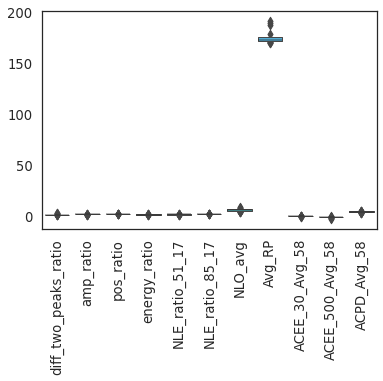

In [11]:
sns.boxenplot(data=data.drop(['Observed', 'NDE_cycle', 'F_Time'], axis=1))
plt.xticks(rotation=90)

In [12]:
data.shape

(16, 14)

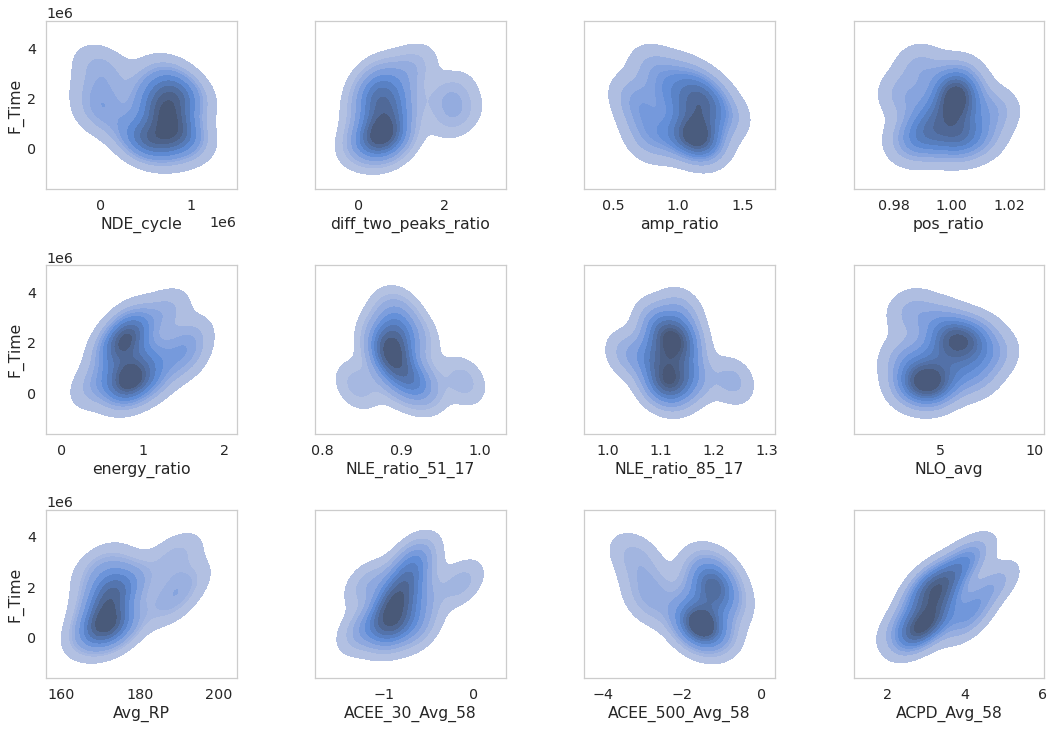

In [13]:
sns.set(font_scale=1.3)
sns.set_style("whitegrid", {'axes.grid' : False})


fig, axes = plt.subplots(3, 4,  sharex=False, sharey=True, figsize=(15,10))
plt.tight_layout(h_pad=3, w_pad=3)

for ax, col in zip(axes.flatten(), data.drop(['Observed'], axis=1).columns[1:]):
    
    sns.kdeplot(x=col, y='F_Time', data=data, fill=True, ax=ax)

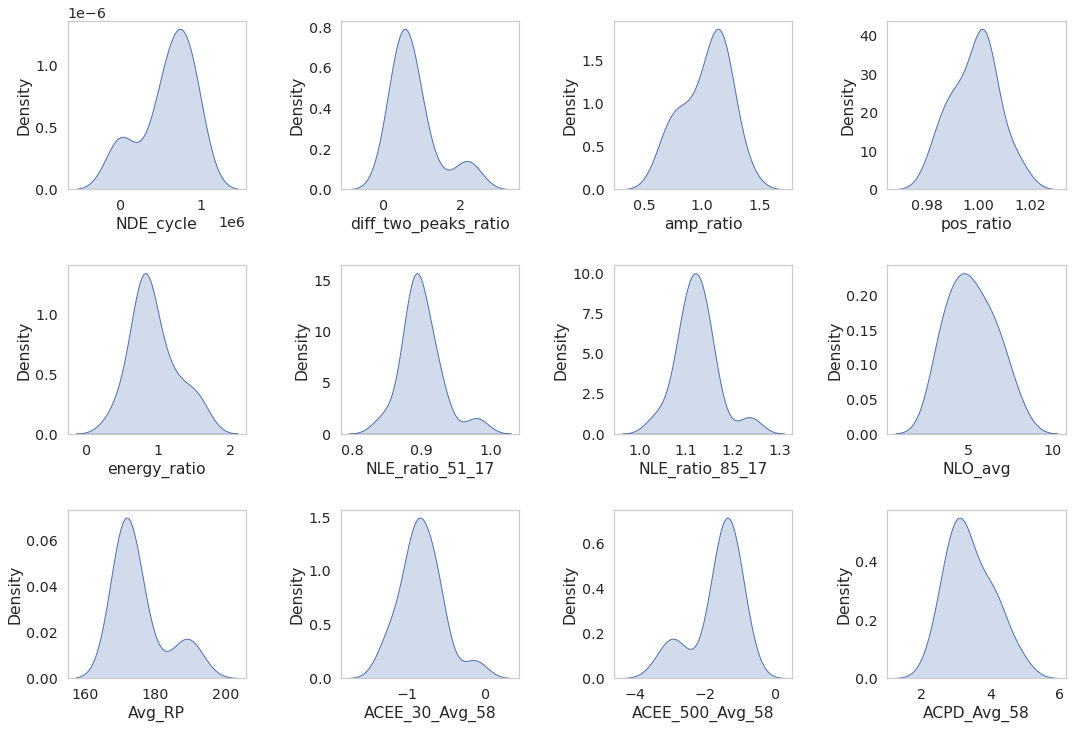

In [14]:
sns.set(font_scale=1.3)
sns.set_style("whitegrid", {'axes.grid' : False})


fig, axes = plt.subplots(3, 4,  sharex=False, sharey=False, figsize=(15,10))
plt.tight_layout(h_pad=3, w_pad=3)

for ax, col in zip(axes.flatten(), data.drop(['Observed'], axis=1).columns[1:]):
    
    sns.kdeplot(x=col, data=data, fill=True, ax=ax)

In [15]:
test = pd.melt(data_f, 
               id_vars=['F_Time'])

In [16]:
test.variable.unique()

array(['NDE_cycle', 'diff_two_peaks_ratio', 'amp_ratio', 'pos_ratio',
       'energy_ratio', 'NLE_ratio_51_17', 'NLE_ratio_85_17', 'NLO_avg',
       'Avg_RP', 'ACEE_30_Avg_58', 'ACEE_500_Avg_58', 'ACPD_Avg_58'],
      dtype=object)

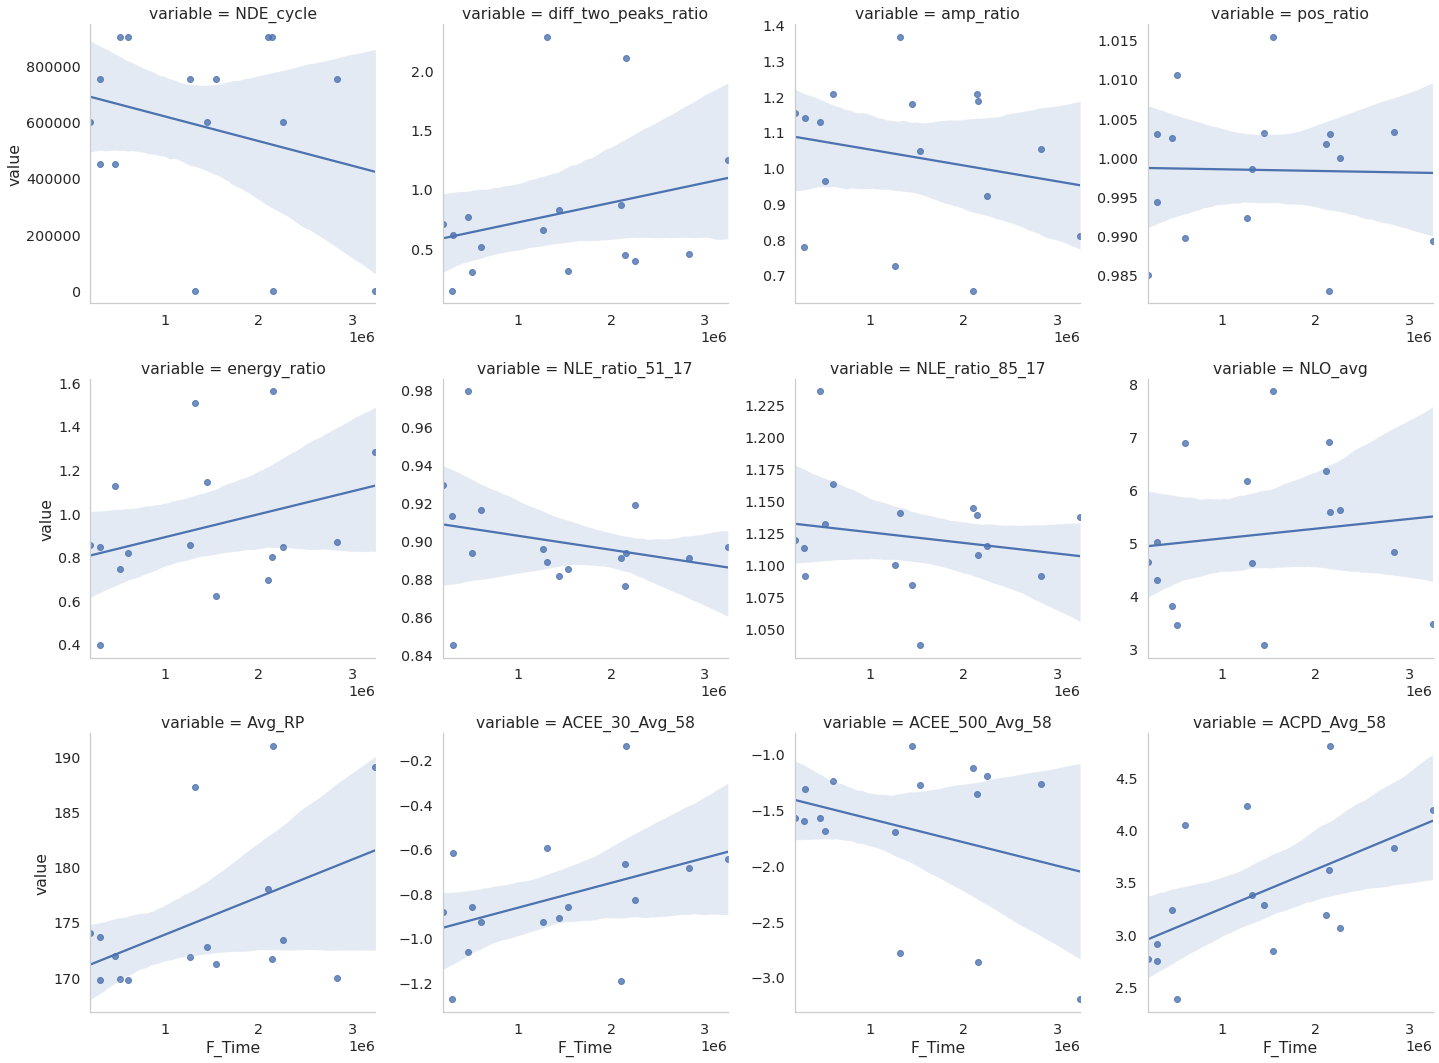

In [17]:
sns.lmplot(x='F_Time', y='value', data=test, 
           col='variable', col_wrap=4,
           sharey=False, sharex=False)